In [ ]:
pip install pandas scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1cX7Skqq5GTUNMdxSXZiZayOyxSAX1-Wz/export?format=csv"
df = pd.read_csv(url)

In [ ]:
columns_of_interest = [
    "Cyclone_Inlet_Gas_Temp",
    "Cyclone_Gas_Outlet_Temp",
    "Cyclone_Outlet_Gas_draft",
    "Cyclone_cone_draft",
    "Cyclone_Inlet_Draft",
    "Cyclone_Material_Temp"
]
data = df[columns_of_interest]

In [ ]:
non_numeric_rows = data[~data.apply(pd.to_numeric, errors='coerce').notnull().all(axis=1)]

In [ ]:
print(non_numeric_rows)

       Cyclone_Inlet_Gas_Temp Cyclone_Gas_Outlet_Temp  \
2471              I/O Timeout             I/O Timeout   
2472              I/O Timeout             I/O Timeout   
2473              I/O Timeout             I/O Timeout   
2474              I/O Timeout             I/O Timeout   
2475              I/O Timeout             I/O Timeout   
...                       ...                     ...   
375585                 886.18                  895.48   
375850                 877.45                  875.96   
376010                 886.24                  891.92   
376885                 886.11                  883.23   
376956                 881.34                  873.76   

       Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Inlet_Draft  \
2471                I/O Timeout        I/O Timeout         I/O Timeout   
2472                I/O Timeout        I/O Timeout         I/O Timeout   
2473                I/O Timeout        I/O Timeout         I/O Timeout   
2474               

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')

In [ ]:
data = data.dropna()

In [ ]:
model = IsolationForest(contamination=0.01)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [ ]:
anomaly_scores = model.decision_function(data)
outlier_predictions = model.predict(data)

In [ ]:
anomaly_scores_series = pd.Series(anomaly_scores, index=data.index)
outlier_predictions_series = pd.Series(outlier_predictions, index=data.index)

In [ ]:
df["AnomalyScore"] = anomaly_scores_series
df["IsAnomaly"] = outlier_predictions_series

In [ ]:
abnormal_periods = df[df["IsAnomaly"] == -1]

In [ ]:
print(abnormal_periods)

                   time Cyclone_Inlet_Gas_Temp Cyclone_Material_Temp  \
5294     1/19/2017 9:10                 975.07               1061.51   
5297     1/19/2017 9:25                 919.53                     0   
5298     1/19/2017 9:30                 919.57                     0   
5299     1/19/2017 9:35                 949.91                     0   
5300     1/19/2017 9:40                 878.66                     0   
...                 ...                    ...                   ...   
375406  7/30/2020 11:35                  746.9                875.25   
375407  7/30/2020 11:40                 752.08                896.32   
375408  7/30/2020 11:45                 755.98                884.55   
375409  7/30/2020 11:50                 757.99                 897.3   
375410  7/30/2020 11:55                 759.53                891.01   

       Cyclone_Outlet_Gas_draft Cyclone_cone_draft Cyclone_Gas_Outlet_Temp  \
5294                     -72.37             -86.48       

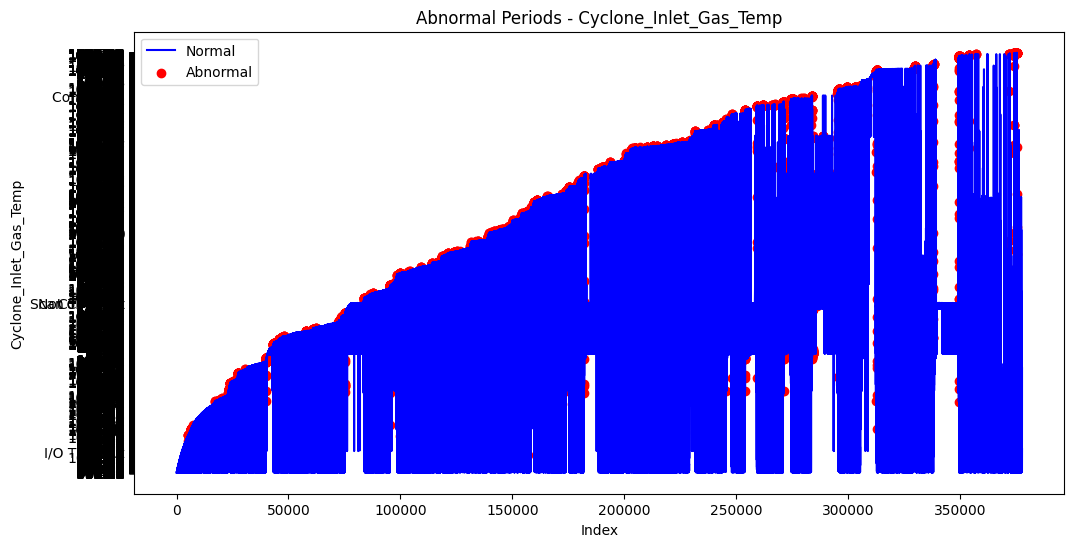

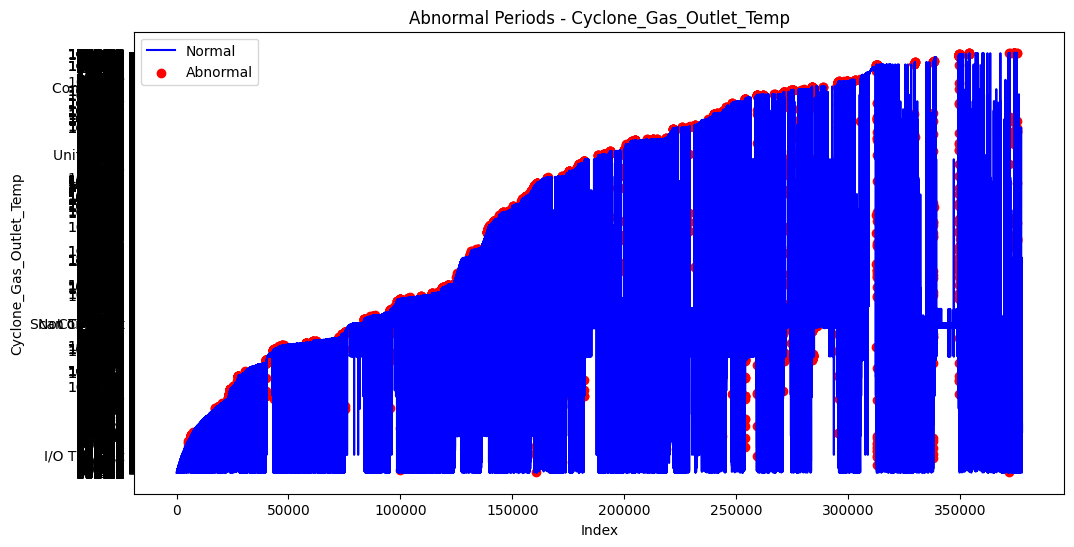

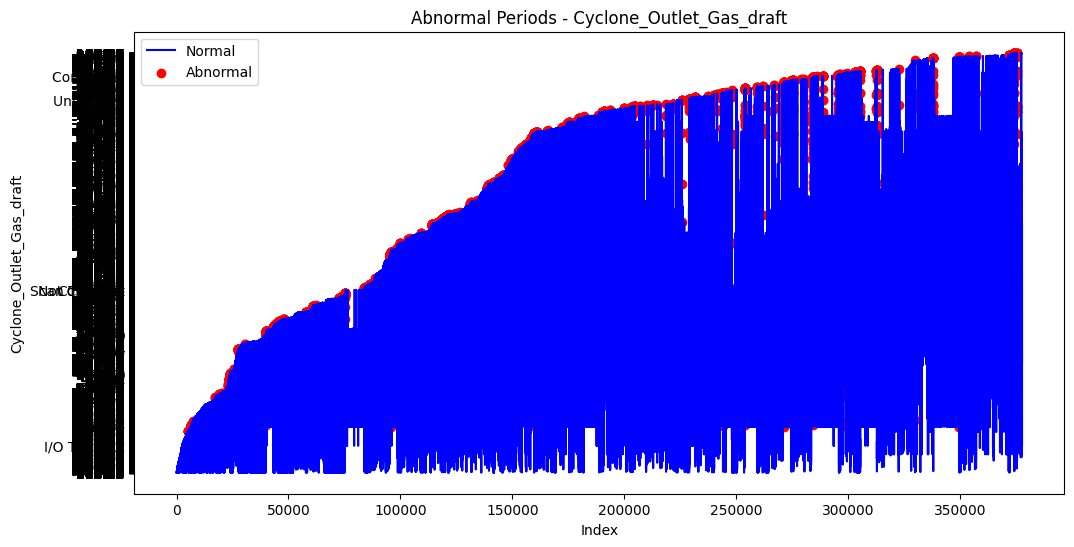

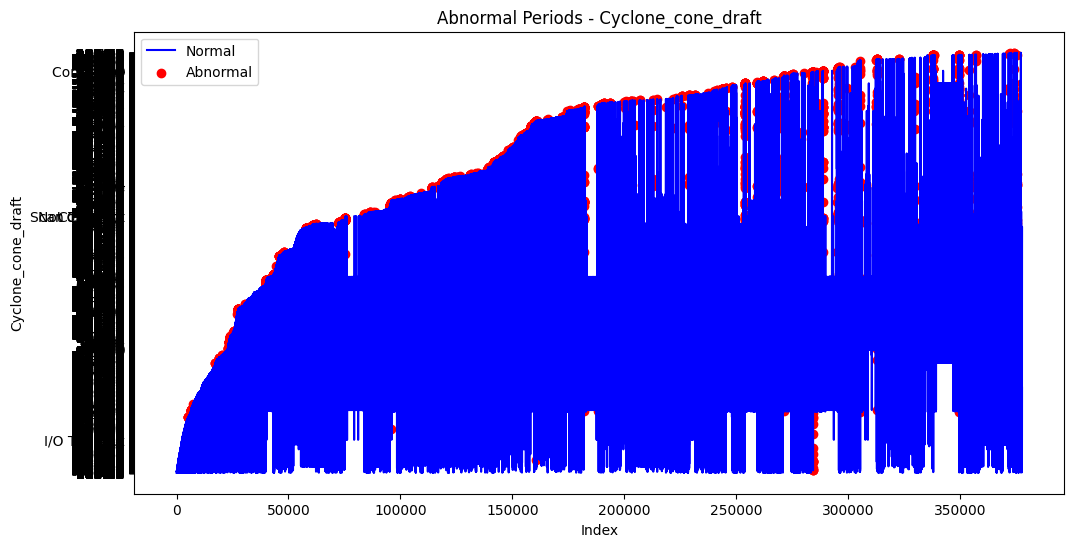

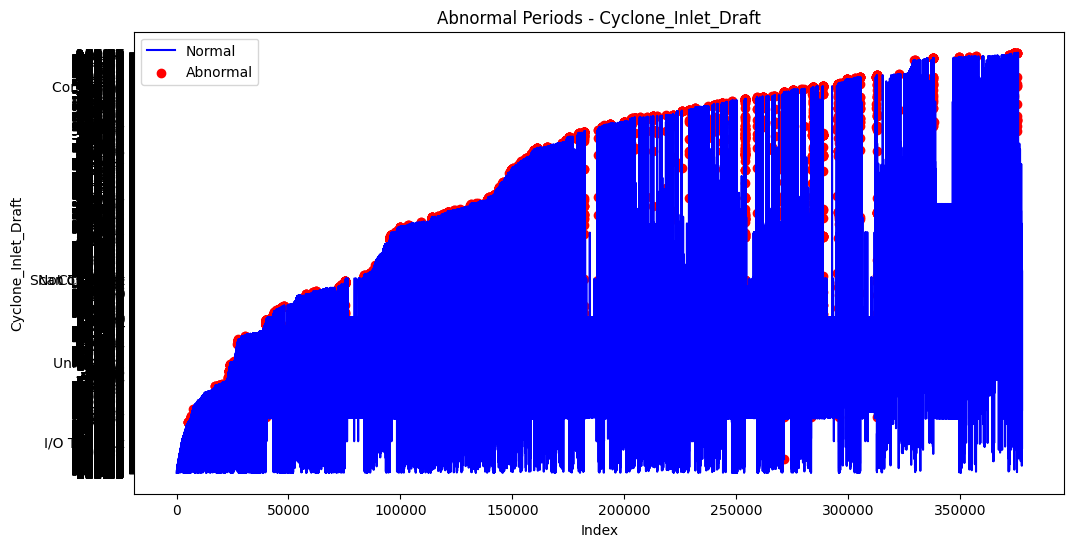

In [ ]:
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[column], color='blue', label='Normal')
    plt.scatter(abnormal_periods.index, abnormal_periods[column], color='red', label='Abnormal')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f"Abnormal Periods - {column}")
    plt.legend()
    plt.show()